# Minimizing Churn of Subscribers by analysing financial habits

In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
dataset = pd.read_csv('churn_data.csv')

In [28]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [29]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Cleaning Data

In [30]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [31]:
dataset = dataset[pd.notnull(dataset['age'])] #Selecting the rows with only notnull values for age 

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 31 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
credit_score               18969 non-null float64
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user          

In [33]:
dataset = dataset.drop(columns = ['credit_score','rewards_earned']) #removed the 2 columns that were having more NaNs

### Histograms of numeric columns

In [42]:
dataset2 = dataset.drop(columns =['user','churn','housing','payment_type','zodiac_sign'])

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

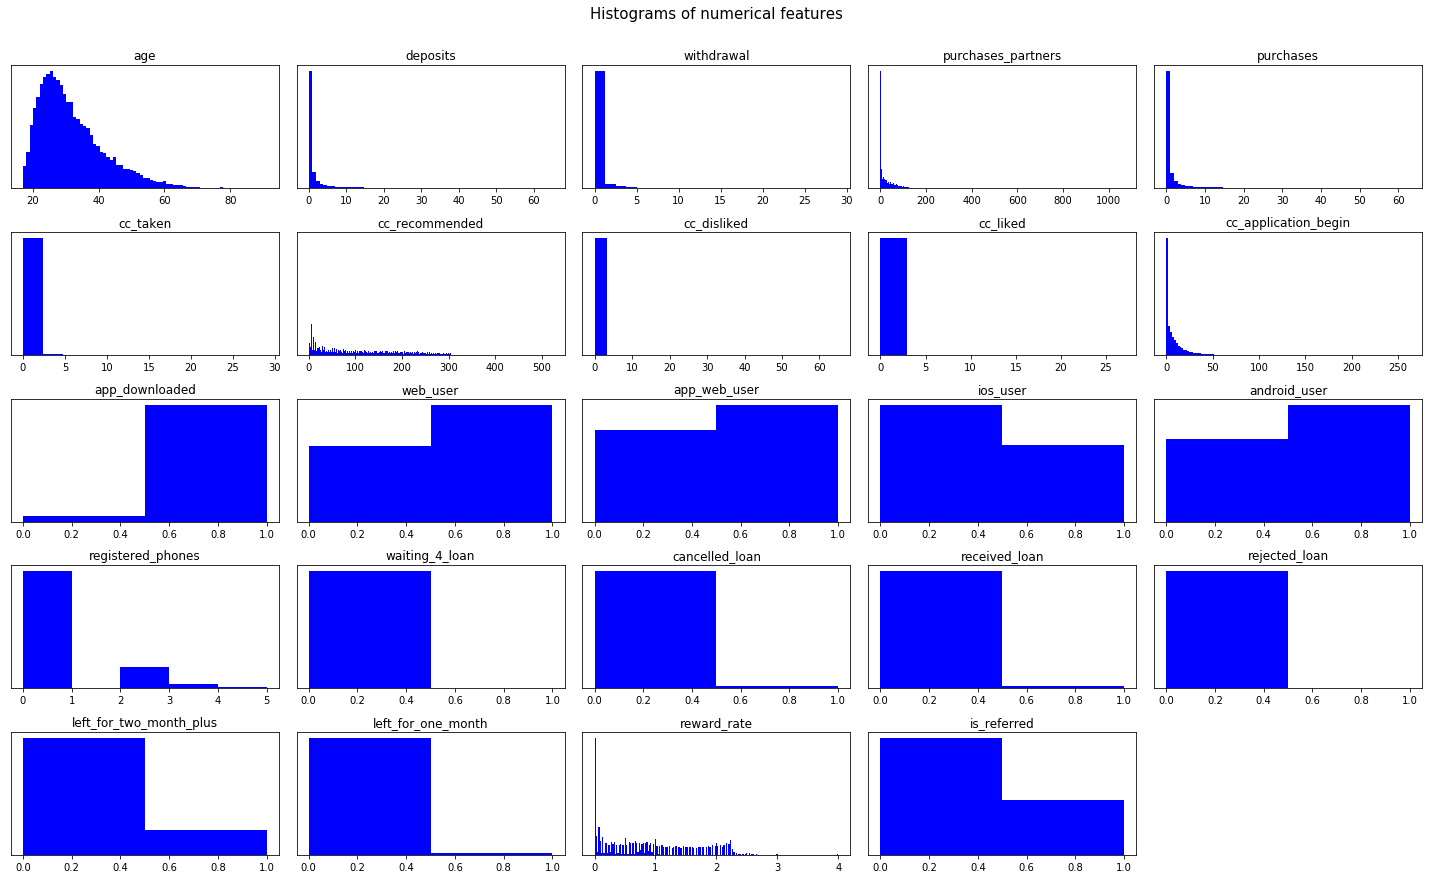

In [46]:
#Histograms    #Plot histograms for all the columns selected in dataset2
fig= plt.figure(figsize=(20,15))   #Setting a figure size
plt.suptitle("Histograms of numerical features",fontsize=15)  #Addidng a head - title for  the figure of histograms
for i in range(1, dataset2.shape[1] + 1):    #range using shape -(1-because subplot wont consider 0 & shape + 1  to consider all columns)
    plt.subplot(6,5,i)                  
    f=plt.gca()    # to get the current polar axes on the current figure
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1]) # Adding subtitles to each histograms as the column names
    
    vals = np.size(dataset2.iloc[:, i- 1].unique()) # getting number of bins in plot from unique values in each colums 
    
    plt.hist(dataset2.iloc[: , i- 1], bins=vals , color ='blue'); #plotting histograms for each columns 
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

### Pie plots for selected columns(Binary columns)

In [49]:
#Pie charts are one of the descriptive plot to find out the columns which has very imbalanced data for binary columns
#( ie very less percent of 0s or 1s)
#This will affect the model to predict wrongly
dataset3 = dataset[['housing','app_downloaded' ,'web_user','app_web_user','ios_user','android_user',
                    'registered_phones','payment_type','waiting_4_loan',             
                    'cancelled_loan','received_loan',  'rejected_loan', 'zodiac_sign',                
                    'left_for_two_month_plus','left_for_one_month','is_referred' ]]


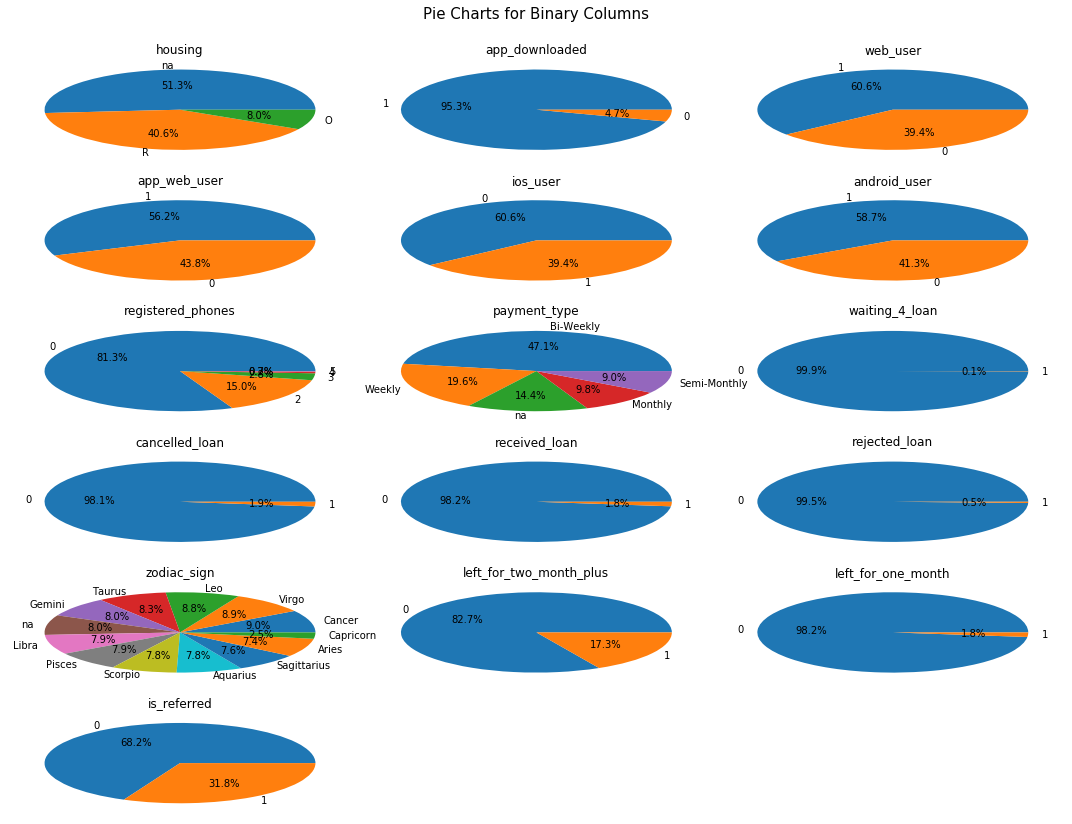

In [53]:
#Plot pie charts for all the columns selected in dataset3
fig= plt.figure(figsize=(15,12))   #Setting a figure size
plt.suptitle("Pie Charts for Binary Columns",fontsize=15)  #Addidng a head - title for  the figure of histograms
for i in range(1, dataset3.shape[1] + 1):    #range using shape -(1-because subplot wont consider 0 & shape + 1  to consider all columns)
    plt.subplot(6,3,i)                  
    f=plt.gca()    # to get the current polar axes on the current figure
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset3.columns.values[i-1]) # Adding subtitles to each histograms as the column names
    values = dataset3.iloc[:, i - 1].value_counts(normalize=True).values
    index =  dataset3.iloc[:, i - 1].value_counts(normalize=True).index
    
    plt.pie(values,labels=index,autopct ='%1.1f%%')  
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

In [ ]:
If you see the pie plots clearly, we can see that for soe columns like housing, web_user etc doesnot have much variation
in the distribution of 1s and 0s.

Check the features - waiting_4_loan,cancelled_loan, received_loan,,left_for_one_month
These features have very less 1s or we can say the distribution is too much imbalanced.

In [55]:
dataset[dataset3['waiting_4_loan'] == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [56]:
dataset[dataset3['cancelled_loan'] == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [57]:
dataset[dataset3['received_loan'] == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [58]:
dataset[dataset3['rejected_loan'] == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [59]:
dataset[dataset3['left_for_one_month'] == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

In [ ]:
From the above value counts we can understand that the distribution of churn feature is not so unevenly distributed for 
columns that has only ones.So, we can conclude that the response variable has an even distribution for the above binary columns.
Basically , we can see that those uneven individual features contains both response variables. So we are good to go.

### Correlation plots

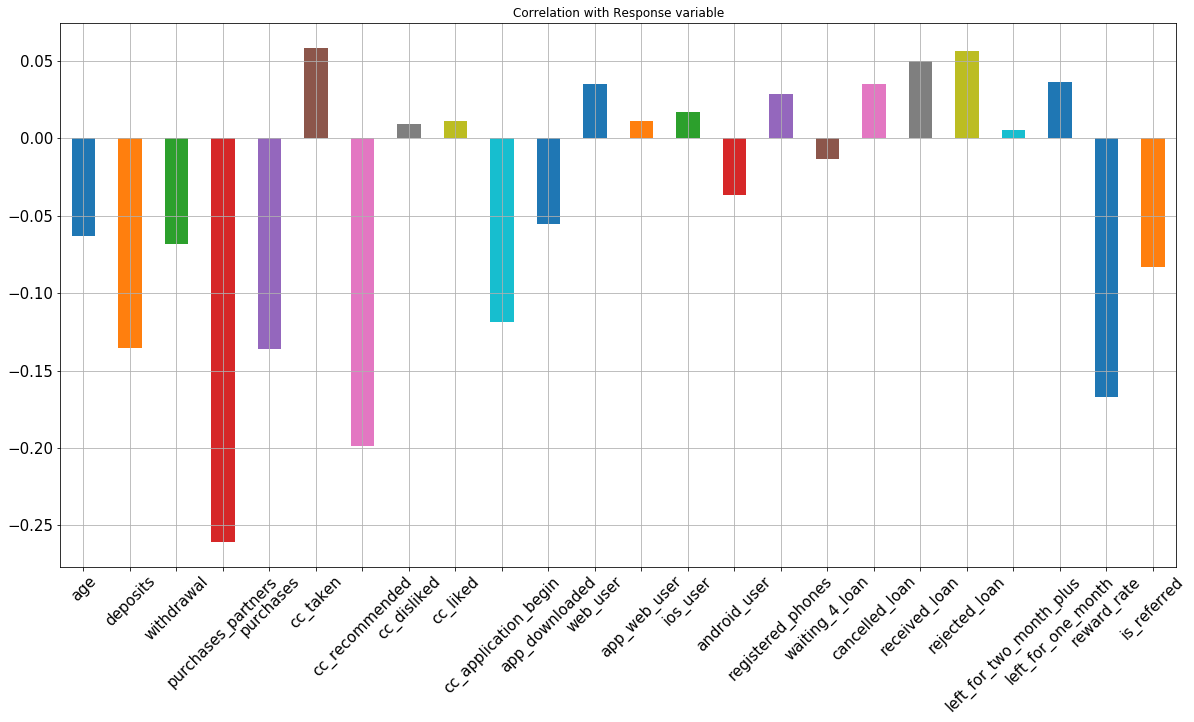

In [61]:
#This is to explore the correlation of numerical variables with the response variable

dataset.drop(columns = ['user','churn','housing','payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar(
figsize=(20,10),title='Correlation with Response variable',fontsize=15,rot=45,grid=True)

In [ ]:
The above bar plot shows how much correlated each of the features are to the response variable Churn.
for eg: Age is negatively correlated to Churn - means - the youndger u are ,the most likely for you to churn
    (The smaller the feature is , the most likely for the response variable to be 1)
    (The less activity you have, the most likely for you to churn - in the case of deposits, withdrawal,purchases etc)

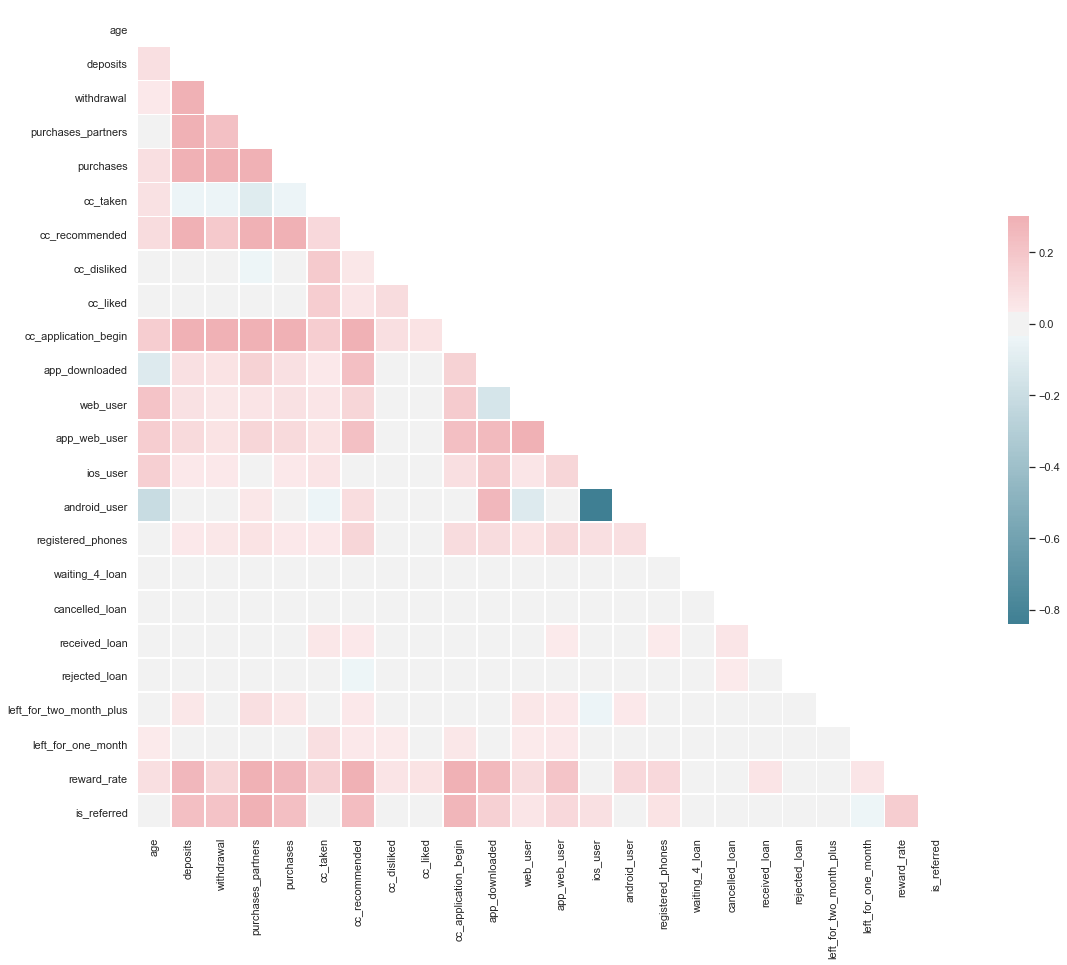

In [62]:
#Correlation Matrix

sns.set(style='white')

corr = dataset.drop(columns =['user','churn']).corr() #Compute the correaltion

#Generate a mask for the upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] =True

#Setup a matplot figure
f,ax = plt.subplots(figsize =(20,15))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#Draw the heatmap with mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,
           square=True,linewidths=.5,cbar_kws={"shrink":.5})


In [64]:
import pandas_profiling
#Profile Report helps in identifying which fields are the best to consider for EDA
report=pandas_profiling.ProfileReport(dataset)
#Converting the report to html and its stored in the same folder
report.to_file("churn_report.html")

In [ ]:
From above correlation plot and the profiling report , we can see that web-user and app-web-user are highly correalted.
So we need to drop one of the column.

In [65]:
dataset = dataset.drop(columns = ['app_web_user'])

In [66]:
dataset.to_csv('new_dataset.csv',index=False)

### Data Preparation for model building

In [70]:
churn = pd.read_csv('new_dataset.csv')

In [71]:
user_identifier = churn['user']

In [73]:
churn_df = churn.drop(columns = ['user'])

In [75]:
#Doing one-hot encoding for categorical variables using pd.dummies

churn_df = pd.get_dummies(churn_df)

In [84]:
churn_df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')

In [83]:
churn_df = churn_df.drop(columns = ['housing_na','zodiac_sign_na','payment_type_na'])

In [95]:
#Splitting Train and test data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(churn_df.drop(columns =['churn']), 
                                                     churn_df['churn'], test_size=0.2, 
                                                     random_state=0)


In [96]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(21596, 41)

(21596,)

(5400, 41)

(5400,)

In [97]:
#Balancing the training Set
import random
y_train.value_counts()

pos_index = y_train[y_train.values ==1].index
neg_index = y_train[y_train.values ==0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

random.seed(0)

higher = np.random.choice(higher, size = len(lower))
lower  = np.asarray(lower)
new_indexes = np.concatenate((lower,higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

#Here we balanced the number of 1s and 0s by utilizing the index. Now in X_train and y_train , the number of 0s and 1s are same.

0    12656
1     8940
Name: churn, dtype: int64

In [99]:
X_train.shape
y_train.shape

(17880, 41)

(17880,)

In [100]:
y_train.value_counts()

1    8940
0    8940
Name: churn, dtype: int64

In [103]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2  = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns  = X_test.columns.values

X_train2.index   = X_train.index.values
X_test2.index    = X_test.index.values

X_train = X_train2
X_test = X_test2

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Annie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


### Model Building

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.6162962962962963

In [108]:
precision_score(y_test,y_pred)  # of all the positives predicted , how many are actually true  (TP/(TP+FP))
# means here , out of all the positives predicted 52% are correct , precision is not that great

0.5254556882463859

In [109]:
recall_score(y_test,y_pred)  # (TP/(TP+FN) meanning  - of all the actual positives that exist, how many did we predicted as true

0.7484333034914951

In [110]:
#in these cases, where the recall score is higher than precision score , we will have to check the f1-score 
#because f1 is the function of precision and recall and it blances them out

f1_score(y_test,y_pred)
#Here the f1-score is almost equal to accuracy score 

0.6174298375184637

<Figure size 1000x700 with 0 Axes>

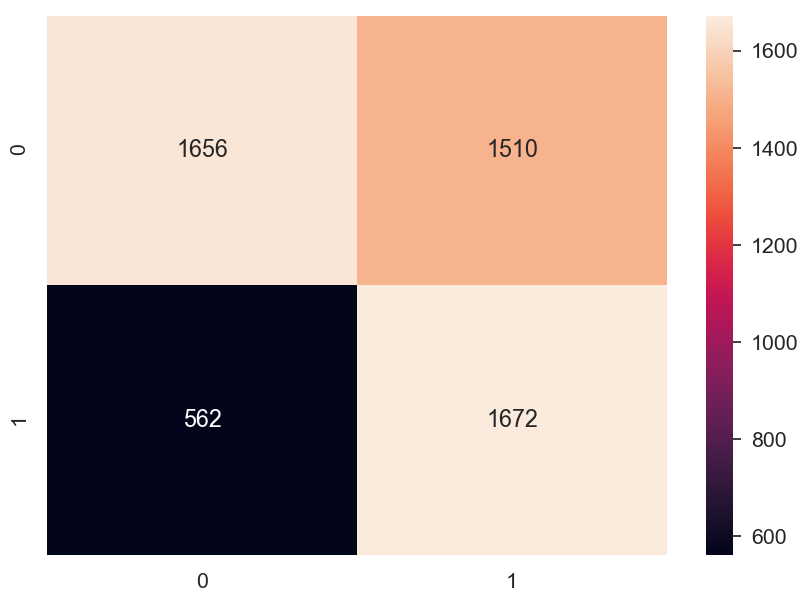

In [111]:
#plotting confusion matrix

df_cm = pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm,annot=True,fmt='g')


### K-Folds Cross validation 

In [112]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier,
                            X = X_train,
                            y=  y_train,
                            cv=10)

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [115]:
accuracies.mean()

0.6450223713646532

### Feature selection 

In [ ]:
We need to see which features are contributing better with their corresponding coefficients and select only those features 
and see if we get a better and faster model than before.

In [116]:
pd.concat([pd.DataFrame(X_train.columns,columns =["features"]),
          pd.DataFrame(np.transpose(classifier.coef_),columns =["coefficients"])],axis=1)

,features,coefficients
0,age,-0.168374
1,deposits,0.158778
2,withdrawal,0.075255
3,purchases_partners,-0.731842
4,purchases,-0.300964
5,cc_taken,0.052238
6,cc_recommended,0.069073
7,cc_disliked,-0.000934
8,cc_liked,0.001846
9,cc_application_begin,0.023852


In [117]:
from sklearn.feature_selection import RFE

In [119]:
classifier = LogisticRegression()
rfe = RFE(classifier,20)
rfe = rfe.fit(X_train,y_train)

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [120]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True  True  True  True  True False  True  True False  True
 False  True False  True  True False False False False False False False
 False False False False False]


In [122]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_one_month', 'reward_rate',
       'housing_O', 'payment_type_Bi-Weekly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly'],
      dtype='object')

In [123]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 21, 20,  8, 16,  1,  1,  6,  1,  1,  1,
        1,  1,  2,  1,  1,  7,  1,  9,  1, 15,  1,  1,  5, 14, 17, 18, 12,
       13,  4, 19, 10,  3, 11, 22])

In [126]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.6094444444444445

0.5195251483911277

0.7444046553267681

0.6119595216191351

In [128]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_],columns =["features"]),
          pd.DataFrame(np.transpose(classifier.coef_),columns =["coefficients"])],axis=1)

,features,coefficients
0,age,-0.167605
1,deposits,0.167986
2,withdrawal,0.080719
3,purchases_partners,-0.719655
4,purchases,-0.298386
5,cc_taken,0.056894
6,cc_recommended,0.087693
7,web_user,0.133761
8,ios_user,0.070696
9,registered_phones,0.108390


In [130]:
#Formating final results 

final_results = pd.concat([y_test,user_identifier],axis=1).dropna()
final_results['predicted_churn'] =y_pred
final_results = final_results[['user','churn','predicted_churn']].reset_index(drop=True)


In [131]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0


### Applying PCA 

In [132]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [138]:
pca.explained_variance_ratio_[:26].sum()

0.8168549534967322

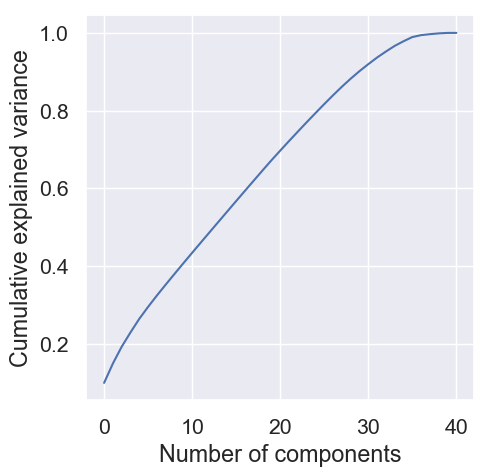

In [143]:
# Plotting relation between components and variance
plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [144]:
# consider first 25 components as they are explaining the 90% of variation in the data

X_pca = PCA(n_components=25)
X_train_pca = X_pca.fit_transform(X_train)
X_test_pca = X_pca.fit_transform(X_test)

Text(0.5,1,'Correlation between different features')

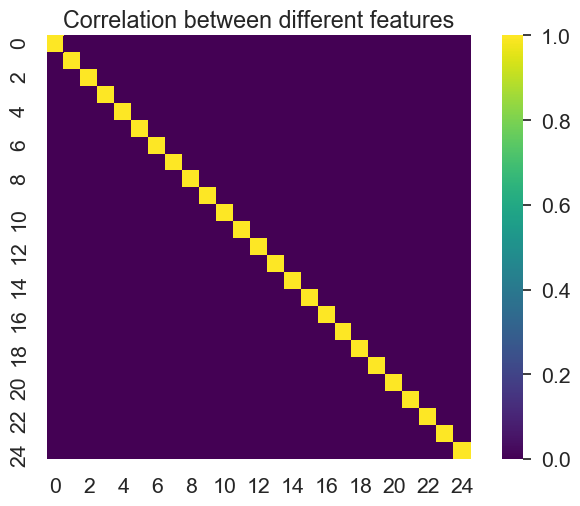

In [145]:
# correlation between the variables after transforming the data with PCA is 0

correlation = pd.DataFrame(X_train_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [147]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
import time

# instantiate model
pca_logreg = LogisticRegression(class_weight='balanced')

start = time.time()
# fit model
pca_logreg.fit(X_train_pca,y_train)
end = time.time()
training_time = end-start
print("Time required to train a Logistic Regression after PCA: ", training_time)

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Time required to train a Logistic Regression after PCA:  0.11593484878540039


In [149]:
y_pred_pca = pca_logreg.predict(X_test_pca)

In [150]:

cm = confusion_matrix(y_test,y_pred_pca)
accuracy_score(y_test,y_pred_pca)
precision_score(y_test,y_pred_pca)
recall_score(y_test,y_pred_pca)
f1_score(y_test,y_pred_pca)

0.5344444444444445

0.4486426999266324

0.5474485228290062

0.49314516129032254

In [ ]:
Here the scores are not too good compared to that of Logistic regression normal and with rfe.
Hence we are not considering the results based on pca.